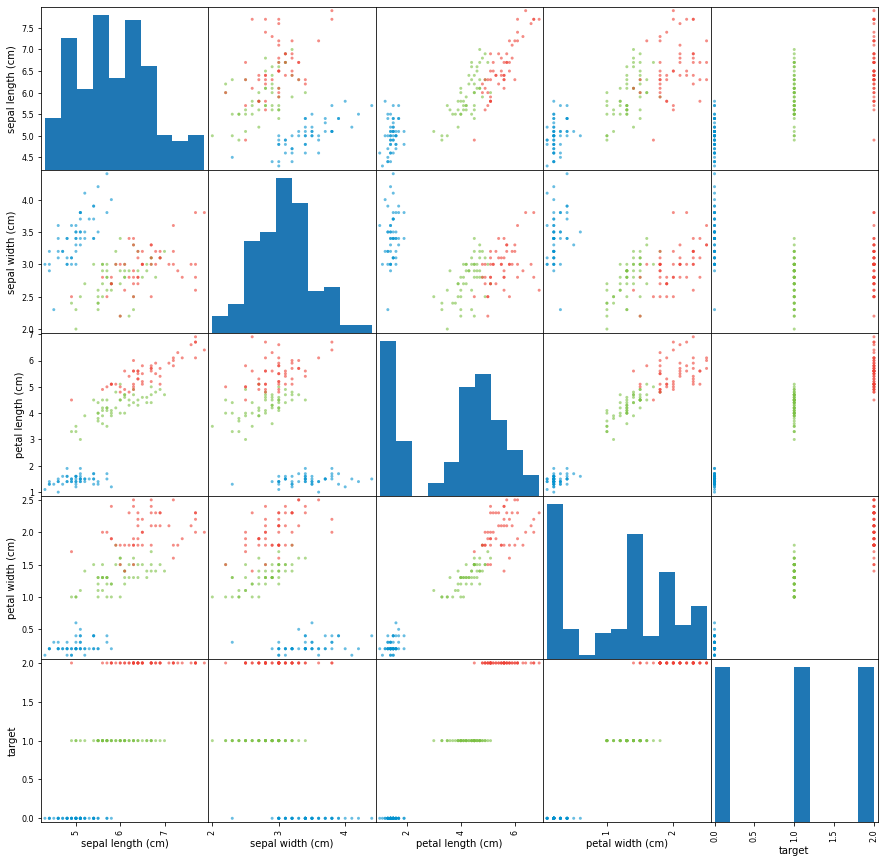

In [ ]:
# writing my plr code fro N dimensional input

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

# Getting the dataset
from sklearn.datasets import load_iris
iris = load_iris()

# plotting the data
from pandas.plotting import scatter_matrix
import pandas as pd
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']
color_wheel = {1: "#0392cf", 2: "#7bc043", 3: "#ee4035"}
colors = iris_data["target"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(15, 15))

# creating arrays to work with
# 2 dimensional to validate with the given code
# creating an array with all the input dimensions (2D here)
in_data = np.zeros((100, 2))
in_data[:, 0] = iris['data'][:100,0]
in_data[:, 1] = iris['data'][:100,1]
labels = iris['target'][:100]


# centering the data
in_data[:, 0] -=np.mean(in_data[:, 0])
in_data[:, 1] -=np.mean(in_data[:, 1])

In [ ]:
# for the 2D data for validation with the given code
# plotting functions for any given 2D array and target

def plot_sep(data, W, labels, color='green'):
  ''' Plot decision boundary hypothesis
  w1 * sepal_len + w2 * sepal_wid = 0
  in input space, highlighting the hyperplane '''
  plt.scatter(data[:, 0], data[:, 1],c=labels,cmap=plt.cm.Paired)
  plt.title("Separation in Input Space")
  #plt.ylim([min(data[:, 0]),max(data[:, 0])])
  #plt.xlim([min(data[:, 1]),max(data[:, 1])])
  plt.xlabel("X dimension")
  plt.ylabel("Y dimension")
  if W[2] != 0:
     m = -W[1]/W[2]
     t = 1 if W[2] > 0 else -1
     plt.plot([-1.5,2.0],[-1.5*m, 2.0*m],'-y',color=color)
     plt.fill_between(
                    [-1.5, 2.0],
                    [m*-1.5, m*2.0],
                    [t*1.5, t*1.5],
                    alpha=0.2,
                    color=color)
  if W[2] == 0: # decision boundary is vertical
      t = 1 if W[1] > 0 else -1
      plt.plot([0, 0],[-1.5, 2.0],'-y',color=color)
      plt.fill_between(
                    [0, 2.0*t],
                    [-1.5, -2.0],
                    [1.5, 2],
                    alpha=0.2,
                    color=color)

  # For plotting weight space
def plot_weight_space(in_data, lab=1, color='steelblue',
                               maxlim=2.0):
  plt.title("Constraint(s) in Weight Space")
  plt.ylim([-maxlim,maxlim])
  plt.xlim([-maxlim,maxlim])
  plt.xlabel("w1")
  plt.ylabel("w2")
  if in_data[:, 1] != 0:
    m = -in_data[:, 0]/in_data[:, 1]
    t = 1*lab if in_data[:, 1] > 0 else -1*lab
    plt.plot([-maxlim, maxlim],
                          [-maxlim*m, maxlim*m],
                          '-y',
                          color=color)
    plt.fill_between([-maxlim, maxlim], # x
                     [m*-maxlim, m*maxlim], # y-min
                     [t*maxlim, t*maxlim], # y-max alpha=0.2,
                     color=color)
  if in_data[:, 1] == 0: # decision boundary is vertical
    t = 1*lab if in_data[:, 0] > 0 else -1*lab
    plt.plot([0, 0],[-maxlim, maxlim],'-y',color=color)
    plt.fill_between([0, 2.0*t],
                                           [-maxlim, -maxlim],
                                           [maxlim, maxlim],
                                           alpha=0.2,
                                           color=color)

In [ ]:
for i in range(0, labels.size,1):
  if labels[i] == 0:
    labels[i]=-1

In [ ]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# this is converting the given pseudo code to work with 2D vectors performed for
# testing and understanding the algo
#GENERALIZED PLR code to work with N-dimensional input is given at the botttom of the file.

def plr(X, t, W, N):
  for n in range(0, N, 1):
    mismatched = False
    for i in range(0, t.size, 1):
      z = W[0]+X[i, 0]*W[1]+X[i, 1]*W[2]
      if(z*(t[i])<=0):
        mismatched = True
        W[0] = W[0]+(t[i])*1
        W[1] = W[1]+ (t[i])*(X[i, 0])
        W[2] = W[2]+ (t[i])*(X[i, 1])
    if(mismatched == False):
      print("converged: n =", n)
      break
  print("learning done")
  for i in range(0, t.size, 1):
    z= W[0]+X[i, 0]*W[1]+X[i, 1]*W[2]
    if(z*(t[i])<=0):
      print("mismatched[", i, "]")
  return W

converged: n = 2
learning done
[0, 1.700000000000001, -1.4]


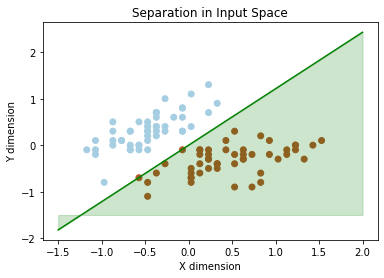

In [ ]:
# testing with the case for iris dataset
W = [0, 0, 0]
W = plr(in_data, labels, W, 10)
print(W)
plot_sep(in_data, W, labels)


In [ ]:
# applying the code to linearly separable and not separable datasets.
from sklearn.datasets import make_blobs, make_moons
# the generated points from make_blobs will be linearly separable while those from make_moons won't be.
sep_data, sep_target = make_blobs(n_samples = 100, centers = 2, n_features=2)
#print(sep_data)
# centering the data
sep_data[:, 0] -=np.mean(sep_data[:, 0])
sep_data[:, 1] -=np.mean(sep_data[:, 1])

nsep_data, nsep_target = make_moons(n_samples=100, noise=0.2)
# centering the data
nsep_data[:, 0] -=np.mean(nsep_data[:, 0])
nsep_data[:, 1] -=np.mean(nsep_data[:, 1])
sep_data.shape

(100, 2)

In [ ]:
for i in range(0, sep_target.size,1):
  if sep_target[i] == 0:
    sep_target[i]=-1

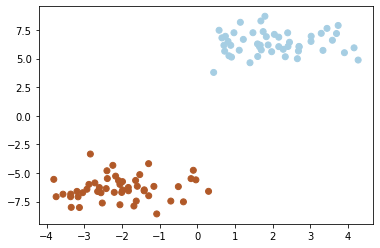

In [ ]:
plt.scatter(sep_data[:, 0], sep_data[:, 1], c=sep_target, cmap=plt.cm.Paired)


converged: n = 1
learning done
[1, -1.1504351067173304, -6.169063556060222]


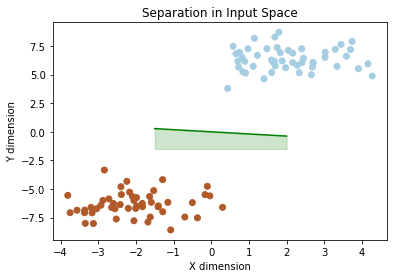

In [ ]:
# performing classification
W = [0, 0, 0]
W = plr(sep_data, sep_target, W, 10)
print(W)
plot_sep(sep_data, W, sep_target)

In [ ]:
for i in range(0, nsep_target.size,1):
  if nsep_target[i] == 0:
    nsep_target[i]=-1

In [ ]:
nsep_target

array([ 1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
        1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1])

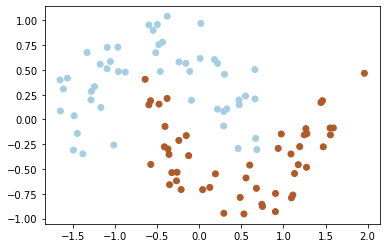

In [ ]:
plt.scatter(nsep_data[:, 0], nsep_data[:, 1], c=nsep_target, cmap=plt.cm.Paired)


learning done
mismatched[ 0 ]
mismatched[ 5 ]
mismatched[ 6 ]
mismatched[ 7 ]
mismatched[ 9 ]
mismatched[ 11 ]
mismatched[ 18 ]
mismatched[ 22 ]
mismatched[ 24 ]
mismatched[ 27 ]
mismatched[ 28 ]
mismatched[ 32 ]
mismatched[ 33 ]
mismatched[ 35 ]
mismatched[ 36 ]
mismatched[ 39 ]
mismatched[ 40 ]
mismatched[ 41 ]
mismatched[ 45 ]
mismatched[ 49 ]
mismatched[ 50 ]
mismatched[ 51 ]
mismatched[ 53 ]
mismatched[ 56 ]
mismatched[ 59 ]
mismatched[ 67 ]
mismatched[ 70 ]
mismatched[ 71 ]
mismatched[ 72 ]
mismatched[ 76 ]
mismatched[ 79 ]
mismatched[ 80 ]
mismatched[ 81 ]
mismatched[ 83 ]
mismatched[ 84 ]
mismatched[ 86 ]
mismatched[ 89 ]
mismatched[ 90 ]
[-1, -0.21015290158514455, -1.5876312536400965]


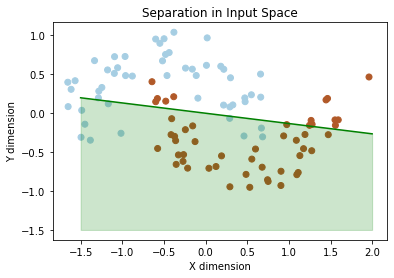

In [ ]:
# performing classification
W = [0, 0, 0]
W = plr(nsep_data, nsep_target, W, 10)
print(W)
plot_sep(nsep_data, W, nsep_target)

In [ ]:
# for excercises with boolean functions - solution with results as 0 and 1 and conditional z>0 are:
# NOT: w0=1; w1 = -2
# AND: w0 = -1.5 ;w1 = 1;w2 = 1
# OR: w0 = 0; w1 = 0.5; w2 = 0.5
# XOR will not happen - since it fails to fulfill the convexity condition. Lines connecting positive and negative examples intersect, which would require the intersection point to be classified as both positive and negative which is impossible.

In [ ]:
# generalized plr
def gplr(X, t, W, N):
  X = X.concatenate((np.ones((t.size, 1))), 1)
  for n in range(0, N, 1):
    mismatched = False
    for i in range(0, t.size, 1):
      #z = W[0]+X[i, 0]*W[1]+X[i, 1]*W[2]
      z = W*X[i, :]
      if(z*(t[i])<=0):
        mismatched = True
        W = W + (t(i))*X[i, :]
        #W[0] = W[0]+(t[i])*1
        #W[1] = W[1]+ (t[i])*(X[i, 0])
        #W[2] = W[2]+ (t[i])*(X[i, 1])
    if(mismatched == False):
      print("converged: n =", n)
      break
  print("learning done")
  for i in range(0, t.size, 1):
    z = W*X[i, :]
    if(z*(t[i])<=0):
      print("mismatched[", i, "]")
  return W


converged: n = 2
learning done
[0, 1.700000000000001, -1.4]


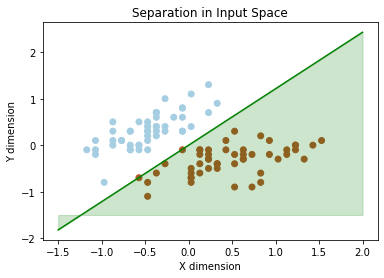

In [ ]:
# validating the generalized plr
W = [0, 0, 0]
W = plr(in_data, labels, W, 10)
print(W)
plot_sep(in_data, W, labels)
